# 안전 데이터 요약  
안전에 대한 총 데이터 개수: 89316개  
  

89316개의 데이터 중에서 해당 카테고리에 부합한 사고만 모든 컬럼에 값이 들어있는 것으로 보임. 따라서 해당 사건에 대한 데이터 개수는 아래와 같음(사고 데이터들끼린 서로 인덱스가 겹치지 않아서 개수 세기가 가능)
- 보행자사고(287)
- 보행노인사고(64)
- 보행자무단횡단사고(378)
- 결빙사고(30)
- 화물차사고(202)  
총 726개 데이터

아래의 변수들은 train의 컬럼과 겹치는 요소가 있음  

**보행자**-> 피해운전자 차종: 보행자  
**보행노인** -> 피해운전자 연령  
**결빙사고** -> 노면상태  
**화물차사고**-> 가해/피해운전자 차종   
  
train과 겹치는 요소들이므로 사용하지 않는 것이 나아보임

보행자무단횡단사고의 경우, 사고유형-세부분류와 법규위반으로 추려봐서 사용해볼 순 있을 것 같음






In [ ]:
train['법규위반'].value_counts()

안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: 법규위반, dtype: int64

In [ ]:
train['사고유형 - 세부분류'].value_counts()

측면충돌          17104
기타            10630
추돌             5885
횡단중            2443
정면충돌            837
차도통행중           616
후진중충돌           613
보도통행중           524
길가장자리구역통행중      467
공작물충돌           324
전도전복 - 전도       144
전도전복 - 전복        10
도로외이탈 - 추락        8
도로외이탈 - 기타        4
Name: 사고유형 - 세부분류, dtype: int64

In [ ]:
condition = (train['법규위반']=='안전운전불이행') & (train['사고유형 - 세부분류'] == "보도통행중")
train.loc[condition]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
464,ACCIDENT_00464,2019-01-15 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 기타,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,여,15세,경상,0,0,1,0,3
509,ACCIDENT_00509,2019-01-16 22,수요일,맑음,대구광역시 달서구 용산동,교차로 - 교차로부근,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,여,25세,경상,0,0,1,0,3
745,ACCIDENT_00745,2019-01-24 15,목요일,맑음,대구광역시 수성구 황금동,단일로 - 기타,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,남,17세,경상,0,0,1,0,3
1197,ACCIDENT_01197,2019-02-04 17,월요일,맑음,대구광역시 달성군 화원읍,주차장 - 주차장,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,여,3세,중상,0,1,0,0,5
1838,ACCIDENT_01838,2019-02-25 16,월요일,맑음,대구광역시 달서구 용산동,단일로 - 기타,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,ACCIDENT_37606,2021-11-03 10,수요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,남,67세,경상,0,0,1,0,3
37781,ACCIDENT_37781,2021-11-08 15,월요일,맑음,대구광역시 동구 율하동,교차로 - 교차로횡단보도내,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,여,76세,중상,0,1,0,0,5
37785,ACCIDENT_37785,2021-11-08 16,월요일,맑음,대구광역시 동구 동호동,단일로 - 기타,건조,차대사람,보도통행중,안전운전불이행,...,상해없음,보행자,남,41세,경상,0,0,1,0,3
38897,ACCIDENT_38897,2021-12-08 18,수요일,맑음,대구광역시 달서구 이곡동,기타 - 기타,건조,차대사람,보도통행중,안전운전불이행,...,부상신고,보행자,여,52세,상해없음,0,0,0,1,1


In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

import geopandas as gpd
from shapely.geometry import Point, MultiPolygon
from pyproj import Transformer

# 보행자

In [ ]:
path = "/content/drive/MyDrive/data/dacon/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역"

pedestrian100 = gpd.read_file(path + "/보행자사고 다발지역_100.gpkg")


In [ ]:
pedestrian100

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077102.303 1745692.817, 10771..."
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077057.173 1745639.546, 10770..."
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077051.871 1745538.189, 10770..."
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077049.547 1745487.411, 10771..."
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077044.105 1745368.495, 10770..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,168686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113905.212 1766486.883, 11138..."
89312,168687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113847.421 1766386.670, 11138..."
89313,168688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113852.491 1766284.918, 11138..."
89314,168701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113842.714 1764974.150, 11138..."


In [ ]:
pedestrian100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             287 non-null    float64 
 2   occrrnc_cnt_sum   287 non-null    float64 
 3   occrrnc_cnt_mean  287 non-null    float64 
 4   caslt_cnt_sum     287 non-null    float64 
 5   caslt_cnt_mean    287 non-null    float64 
 6   dth_dnv_cnt_sum   287 non-null    float64 
 7   dth_dnv_cnt_mean  287 non-null    float64 
 8   se_dnv_cnt_sum    287 non-null    float64 
 9   se_dnv_cnt_mean   287 non-null    float64 
 10  sl_dnv_cnt_sum    287 non-null    float64 
 11  sl_dnv_cnt_mean   287 non-null    float64 
 12  wnd_dnv_cnt_sum   287 non-null    float64 
 13  wnd_dnv_cnt_mean  287 non-null    float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB


In [ ]:
pedestrian100.isnull().sum()

id                      0
count               89029
occrrnc_cnt_sum     89029
occrrnc_cnt_mean    89029
caslt_cnt_sum       89029
caslt_cnt_mean      89029
dth_dnv_cnt_sum     89029
dth_dnv_cnt_mean    89029
se_dnv_cnt_sum      89029
se_dnv_cnt_mean     89029
sl_dnv_cnt_sum      89029
sl_dnv_cnt_mean     89029
wnd_dnv_cnt_sum     89029
wnd_dnv_cnt_mean    89029
geometry                0
dtype: int64

In [ ]:
pds100 = pedestrian100

In [ ]:
# 결측치인 항들은 모두 같은 index?
missing_indices = pedestrian100[pedestrian100.notnull().any(axis = 1)].index
missing_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            89306, 89307, 89308, 89309, 89310, 89311, 89312, 89313, 89314,
            89315],
           dtype='int64', length=89316)

In [ ]:
pedestrian100.columns

Index(['id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean', 'caslt_cnt_sum',
       'caslt_cnt_mean', 'dth_dnv_cnt_sum', 'dth_dnv_cnt_mean',
       'se_dnv_cnt_sum', 'se_dnv_cnt_mean', 'sl_dnv_cnt_sum',
       'sl_dnv_cnt_mean', 'wnd_dnv_cnt_sum', 'wnd_dnv_cnt_mean', 'geometry'],
      dtype='object')

In [ ]:
notnull_pds = pds100[pds100['occrrnc_cnt_sum'].notnull()==True]
notnull_pds

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry
23897,55144,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((1089032.542 1762287.411, 10891..."
23898,55145,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((1089032.542 1762187.411, 10891..."
24189,55602,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((1089132.542 1762287.411, 10892..."
24190,55603,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((1089132.542 1762187.411, 10892..."
25065,56977,1.0,5.0,5.0,7.0,7.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((1089432.542 1762187.411, 10895..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80555,142138,1.0,4.0,4.0,6.0,6.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,0.0,"MULTIPOLYGON (((1108032.542 1764887.411, 11081..."
80556,142139,1.0,4.0,4.0,6.0,6.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,0.0,"MULTIPOLYGON (((1108032.542 1764787.411, 11081..."
80557,142140,1.0,4.0,4.0,6.0,6.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,0.0,"MULTIPOLYGON (((1108032.542 1764687.411, 11081..."
80801,142597,1.0,4.0,4.0,6.0,6.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,0.0,"MULTIPOLYGON (((1108132.542 1764787.411, 11082..."


In [ ]:
notnull_pds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,287.0,89611.581882,17367.409071,55144.0,79791.5,87648.0,99320.5,142598.0
count,287.0,1.006969,0.083332,1.0,1.0,1.0,1.0,2.0
occrrnc_cnt_sum,287.0,4.209059,0.546625,4.0,4.0,4.0,4.0,8.0
occrrnc_cnt_mean,287.0,4.181185,0.444777,4.0,4.0,4.0,4.0,6.0
caslt_cnt_sum,287.0,6.320557,1.424693,4.0,5.0,6.0,7.0,12.0
caslt_cnt_mean,287.0,6.282230,1.371079,4.0,5.0,6.0,7.0,12.0
dth_dnv_cnt_sum,287.0,0.132404,0.339522,0.0,0.0,0.0,0.0,1.0
dth_dnv_cnt_mean,287.0,0.130662,0.336322,0.0,0.0,0.0,0.0,1.0
se_dnv_cnt_sum,287.0,4.313589,0.835776,3.0,4.0,4.0,4.0,8.0
se_dnv_cnt_mean,287.0,4.287456,0.792303,3.0,4.0,4.0,4.0,7.0


9만개 데이터에서 결측치 아닌 287개 데이터 살리는 의미가 있나?

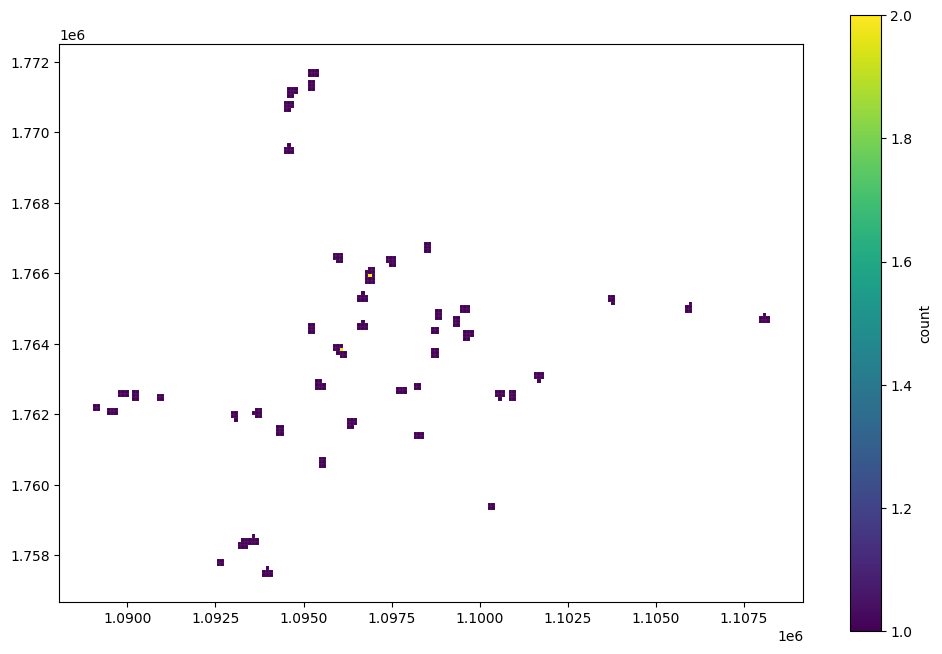

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (12,8))
pds100.plot(ax=ax, legend = True, legend_kwds={"label":"count"},column = 'count',linewidth = 0.05,edgecolor = '0.8')

plt.show()

# 보행노인

In [ ]:
path = "/content/drive/MyDrive/data/dacon/external_open/대구 빅데이터 마트 데이터/7. 안전/"

'/content/drive/MyDrive/data/dacon/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역'

In [ ]:
path = "/content/drive/MyDrive/data/dacon/external_open/대구 빅데이터 마트 데이터/7. 안전/"
old_pds100 = gpd.read_file(path + "2. 보행노인사고 다발지역/보행노인사고 다발지역_100.gpkg")

In [ ]:
old_pds100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             64 non-null     float64 
 2   occrrnc_cnt_sum   64 non-null     float64 
 3   occrrnc_cnt_mean  64 non-null     float64 
 4   caslt_cnt_sum     64 non-null     float64 
 5   caslt_cnt_mean    64 non-null     float64 
 6   dth_dnv_cnt_sum   64 non-null     float64 
 7   dth_dnv_cnt_mean  64 non-null     float64 
 8   se_dnv_cnt_sum    64 non-null     float64 
 9   se_dnv_cnt_mean   64 non-null     float64 
 10  sl_dnv_cnt_sum    64 non-null     float64 
 11  sl_dnv_cnt_mean   64 non-null     float64 
 12  wnd_dnv_cnt_sum   64 non-null     float64 
 13  wnd_dnv_cnt_mean  64 non-null     float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB


In [ ]:
notnull_old_pds = old_pds100[old_pds100['occrrnc_cnt_sum'].notnull()==True]
notnull_old_pds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,64.0,97480.562500,10933.537957,80244.0,89383.25,99320.0,104352.5,116088.0
count,64.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
occrrnc_cnt_sum,64.0,5.578125,1.004825,5.0,5.00,5.0,6.0,8.0
occrrnc_cnt_mean,64.0,5.578125,1.004825,5.0,5.00,5.0,6.0,8.0
caslt_cnt_sum,64.0,6.296875,1.217331,5.0,5.00,6.0,7.0,9.0
caslt_cnt_mean,64.0,6.296875,1.217331,5.0,5.00,6.0,7.0,9.0
dth_dnv_cnt_sum,64.0,0.218750,0.629153,0.0,0.00,0.0,0.0,2.0
dth_dnv_cnt_mean,64.0,0.218750,0.629153,0.0,0.00,0.0,0.0,2.0
se_dnv_cnt_sum,64.0,5.515625,1.112586,4.0,5.00,5.0,6.0,8.0
se_dnv_cnt_mean,64.0,5.515625,1.112586,4.0,5.00,5.0,6.0,8.0


In [ ]:
# 일반 보행자와 보행 노인 중에 겹치는 인덱스가 있는지
old_indices = old_pds100[old_pds100['occrrnc_cnt_sum'].notnull()==True]['id']

for index in old_indices:
  if index in pds100[pds100['occrrnc_cnt_sum'].notnull()==True]['id']:
    print(index)

겹치는 index 없음

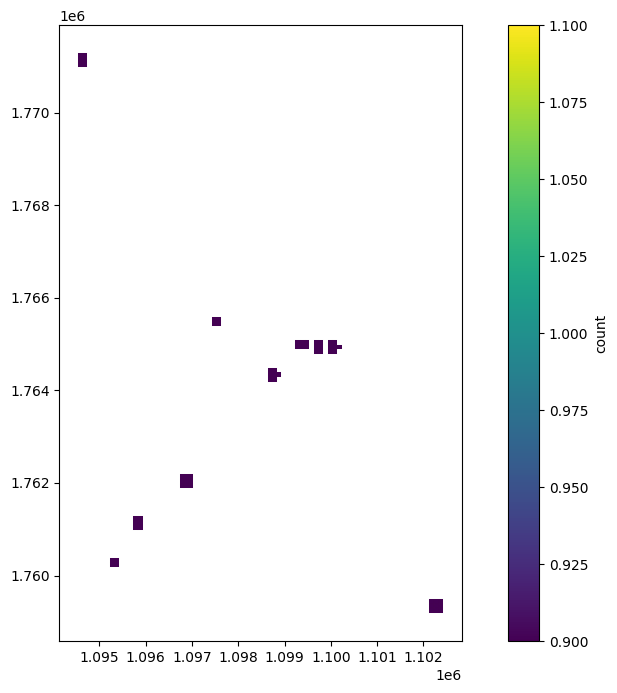

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (12,8))
old_pds100.plot(ax=ax, legend = True, legend_kwds={"label":"count"},column = 'count',linewidth = 0.01,edgecolor = '0.3')

plt.show()

# 보행자무단횡단

In [ ]:
jaywalking = gpd.read_file(path+"5. 보행자무단횡단사고 다발지역/보행자무단횡단사고 다발지역_100.gpkg")
jaywalking.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             378 non-null    float64 
 2   occrrnc_cnt_sum   378 non-null    float64 
 3   occrrnc_cnt_mean  378 non-null    float64 
 4   caslt_cnt_sum     378 non-null    float64 
 5   caslt_cnt_mean    378 non-null    float64 
 6   dth_dnv_cnt_sum   378 non-null    float64 
 7   dth_dnv_cnt_mean  378 non-null    float64 
 8   se_dnv_cnt_sum    378 non-null    float64 
 9   se_dnv_cnt_mean   378 non-null    float64 
 10  sl_dnv_cnt_sum    378 non-null    float64 
 11  sl_dnv_cnt_mean   378 non-null    float64 
 12  wnd_dnv_cnt_sum   378 non-null    float64 
 13  wnd_dnv_cnt_mean  378 non-null    float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB


In [ ]:
jaywalking

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077102.303 1745692.817, 10771..."
1,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077057.173 1745639.546, 10770..."
2,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077051.871 1745538.189, 10770..."
3,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077049.547 1745487.411, 10771..."
4,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1077044.105 1745368.495, 10770..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,168686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113905.212 1766486.883, 11138..."
89312,168687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113847.421 1766386.670, 11138..."
89313,168688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113852.491 1766284.918, 11138..."
89314,168701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((1113842.714 1764974.150, 11138..."


보행자 무단횡단: 387개

In [ ]:
# 무단횡단으로 인한 보행자 사고와 일반보행자/보행 노인과 얼마나 겹치는지
indices = pds100[pds100['occrrnc_cnt_sum'].notnull()==True]['id'] + old_indices

jaywalking_indices = jaywalking[jaywalking['occrrnc_cnt_sum'].notnull()==True]['id']
for index in jaywalking_indices:
  if index in indices:
    print(index)

무단횡단 사고자와 일반/노인 보행자와는 겹치는 인덱스 없음

# 결빙사고

In [ ]:
frost = gpd.read_file(path + "8. 결빙사고 다발지역/결빙사고 다발지역 _100.gpkg")
frost.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             30 non-null     float64 
 2   occrrnc_cnt_sum   30 non-null     float64 
 3   occrrnc_cnt_mean  30 non-null     float64 
 4   caslt_cnt_sum     30 non-null     float64 
 5   caslt_cnt_mean    30 non-null     float64 
 6   dth_dnv_cnt_sum   30 non-null     float64 
 7   dth_dnv_cnt_mean  30 non-null     float64 
 8   se_dnv_cnt_sum    30 non-null     float64 
 9   se_dnv_cnt_mean   30 non-null     float64 
 10  sl_dnv_cnt_sum    30 non-null     float64 
 11  sl_dnv_cnt_mean   30 non-null     float64 
 12  wnd_dnv_cnt_sum   30 non-null     float64 
 13  wnd_dnv_cnt_mean  30 non-null     float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB


In [ ]:
indices = indices + jaywalking_indices

frost_indices = frost[frost['occrrnc_cnt_sum'].notnull()==True]['id']
for index in frost_indices:
  if index in indices:
    print(index)

# 화물차사고

In [ ]:
truck = gpd.read_file(path + "9. 화물차사고 다발지역/화물차사고 다발지역_100.gpkg")
truck.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             202 non-null    float64 
 2   occrrnc_cnt_sum   202 non-null    float64 
 3   occrrnc_cnt_mean  202 non-null    float64 
 4   caslt_cnt_sum     202 non-null    float64 
 5   caslt_cnt_mean    202 non-null    float64 
 6   dth_dnv_cnt_sum   202 non-null    float64 
 7   dth_dnv_cnt_mean  202 non-null    float64 
 8   se_dnv_cnt_sum    202 non-null    float64 
 9   se_dnv_cnt_mean   202 non-null    float64 
 10  sl_dnv_cnt_sum    202 non-null    float64 
 11  sl_dnv_cnt_mean   202 non-null    float64 
 12  wnd_dnv_cnt_sum   202 non-null    float64 
 13  wnd_dnv_cnt_mean  202 non-null    float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB


In [ ]:
indices = indices + frost_indices

truck_indices = truck[truck['occrrnc_cnt_sum'].notnull()==True]['id']
for index in truck_indices:
  if index in indices:
    print(index)

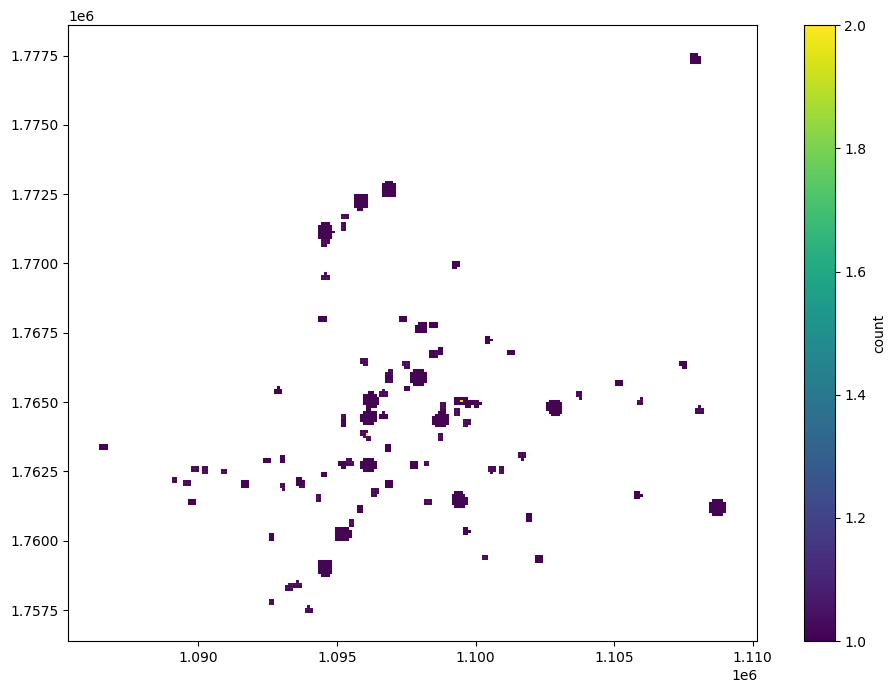

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (12,8))
pds100.plot(ax=ax,column = 'count',linewidth = 0.05,edgecolor = '0.8')
old_pds100.plot(ax=ax,column = 'count',linewidth = 0.05,edgecolor = '0.3')
jaywalking.plot(ax=ax,column = 'count',linewidth = 0.05,edgecolor = '0.3')
frost.plot(ax=ax,column = 'count',linewidth = 0.05,edgecolor = '0.3')
truck.plot(ax=ax, legend = True, legend_kwds={"label":"count"},column = 'count',linewidth = 0.05,edgecolor = '0.3')

plt.show()

In [ ]:
len(indices)

726